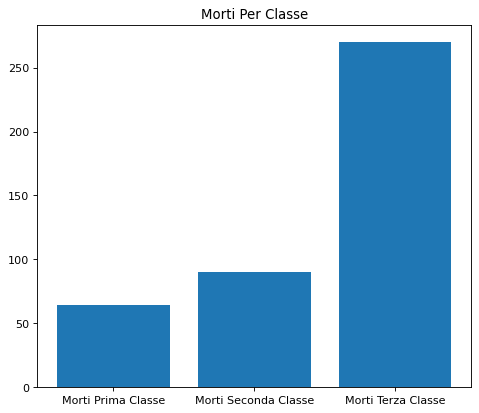

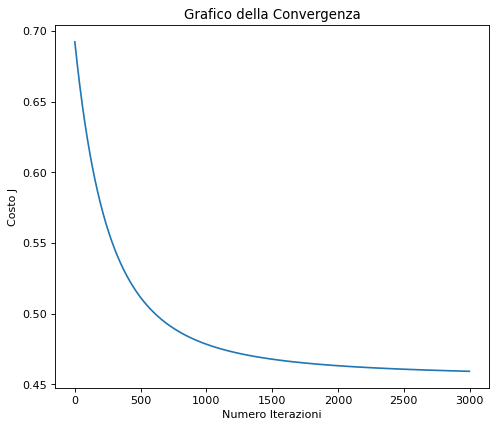

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#defining function
def sigmoid(z):
    sigmoid = 1/(1+np.exp(-1*z))               
    return sigmoid

def featureNormalize(X):
    X_Norm = X.astype(float)                                     
    mu = X.mean(axis=0)
    sigma = X.std(axis=0)                                        
    columns = np.shape(X)[1]
    for i in range(0,columns):
        X_Norm[:,i] = (X[:,i] - mu[i]) / (sigma[i])              
    return X_Norm, mu, sigma

def PolynomialFeatures(X1, X2, degree): 
    out = np.ones([len(X1),sum(range(degree + 2))])
    curr_column = 1
    for i in range(1, degree):
        for j in range(0, i):
            out[:, curr_column] = np.power(X1, i-j) * np.power(X2, j)
            curr_column += 1
    return out;

def costFunction(X, y, theta):
    m = len(y)                                        
    h = sigmoid(np.dot(X,theta))
    cost = -y*np.log(h)-(1-y)*np.log(1-h)
    J = (1/m)*sum(cost)
    return J

def gradientDescend(X, y, theta, alpha, lamb, num_iters):
    m = np.size(y)
    J_history = np.zeros([num_iters, 1])
    alpham = alpha / m;
    for i in range(num_iters):
        h = sigmoid(np.dot(X,theta))
        theta = theta.dot(1-(alpham * lamb))- (alpham)*(np.transpose(X).dot(h-y))
        J_history[i] = costFunction(X, y, theta)
    return theta, J_history

#import data
data= np.asmatrix(pd.read_csv("titanicTrain.csv"))     

colum = np.shape(data)[1]
X = np.array(data[:, 1:(colum)])
y = np.array(data[:, 0])                                

#plotting      
morti1Class = 0
morti2Class = 0
morti3Class = 0
lines = np.shape(X)[0]
for i in range(lines):
    if((y[i] == 0) and (X[i,0] == 1)):
        morti1Class +=1
    if((y[i] == 0) and (X[i,0] == 2)):
        morti2Class +=1
    if((y[i] == 0) and (X[i,0] == 3)):
        morti3Class +=1
plt.figure(1, figsize=(7,6), dpi=80)
plt.bar(['Morti Prima Classe', 'Morti Seconda Classe', 'Morti Terza Classe'], [morti1Class, morti2Class, morti3Class])
plt.title('Morti Per Classe')
plt.show()

#features normalized
X, mu, sigma = featureNormalize(X)
[m,n] = np.shape(X)
X = np.c_[np.ones([m,1]), X]
[m,n] = np.shape(X)

#learning parameters
alpha = 0.007                                                   
itera = 3000
theta_init = np.zeros([n,1])
lamb = 10

#execute learning
theta, J_history = gradientDescend(X, y, theta_init, alpha, lamb, itera)

#plotting convergence graph
iteration_vector = np.arange(0, itera)
plt.figure(2, figsize=(7,6), dpi=80)
plt.plot(iteration_vector, J_history)
plt.title("Grafico della Convergenza")
plt.xlabel("Numero Iterazioni")                  
plt.ylabel("Costo J")
plt.show()

#predictions
PREDICT_X = X[0:10,:]
predict = np.round(sigmoid(PREDICT_X.dot(theta)))
error = predict - y[0:10]
absErr = abs(error)